In [4]:
# To create interactive plots
import plotly.graph_objects as go
import json
import pandas as pd
import nltk
from os import listdir
from os.path import isfile, join
import seaborn as sns
from tqdm import tqdm
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import string
from nltk.stem import WordNetLemmatizer
from pattern.en import tag
from nltk.corpus import wordnet as wn
import warnings
import scipy.sparse as sp 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from nltk.corpus import reuters
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import nltk.data
import math
import re
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn
import numpy as np
import pandas as pd
import scipy as sc
stop_words = stopwords.words('english')
ideal_sent_length = 20.0
stemmer = SnowballStemmer("english")
import re
from urllib.request import urlopen
#import gensim 
import numpy as np 
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import re
import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim

import spacy
import joblib
from tqdm import tqdm
import seaborn as sb
from matplotlib import pyplot as plt

wnl = WordNetLemmatizer()

In [3]:
path = r"C:\bur\CORD-19-research-challenge"
all_json = glob.glob(f'{path}/**/*.json', recursive=True)
len(all_json)


29315

In [4]:
metadata_path = f'{path}/metadata.csv'
# load metadata
metadata = pd.read_csv(metadata_path)
metadata.head()


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [5]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            dic={'title':[]} 
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.metadataa = []
            self.metadata = content['metadata']
            meta=self.metadata
            self.abstract = []
            self.body_text = []
            
            
           
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
                
           
                tit=meta['title']
                dic['title'].append(tit)
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
            self.metadataa = tit
    def __repr__(self):
        return f'{self.metadataa}...'
first_row = FileReader(all_json[0])
print(first_row)

The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3...


In [7]:
dict_ = {'paper_id': [], 'abstract': [], 'body_text': [],'title':[]}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    content = FileReader(entry)
    dict_['paper_id'].append(content.paper_id)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
    dict_['title'].append(content.metadataa)
    
    
papers = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text','title'])
papers.head()

Processing index: 0 of 29315
Processing index: 2931 of 29315
Processing index: 5862 of 29315
Processing index: 8793 of 29315
Processing index: 11724 of 29315
Processing index: 14655 of 29315
Processing index: 17586 of 29315
Processing index: 20517 of 29315
Processing index: 23448 of 29315
Processing index: 26379 of 29315
Processing index: 29310 of 29315


,paper_id,abstract,body_text,title
0,0015023cc06b5362d332b3baf348d11567ca2fbb,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",The RNA pseudoknots in foot-and-mouth disease ...
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,,The 2019-nCoV epidemic has spread across China...,Healthcare-resource-adjusted vulnerabilities t...
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...","Real-time, MinION-based, amplicon sequencing f..."
3,0139ea4ca580af99b602c6435368e7fdbefacb03,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,A Combined Evidence Approach to Prioritize Nip...
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",Assessing spread risk of Wuhan novel coronavir...


In [44]:
#append all json files to the corresponding metadata
full_df = papers\
    .merge(metadata.rename(columns={'sha':'paper_id'}).drop(['abstract','title'], axis=1), 
           on='paper_id', how='left')

full_df.head()

,paper_id,abstract,body_text,title,source_x,doi,pmcid,pubmed_id,license,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,0015023cc06b5362d332b3baf348d11567ca2fbb,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",The RNA pseudoknots in foot-and-mouth disease ...,biorxiv,10.1101/2020.01.10.901801,NaN,NaN,biorxiv,2020-01-11,"Ward, J. C. J.; Lasecka-Dykes, L.; Neil, C.; A...",NaN,NaN,NaN,True,biorxiv_medrxiv
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,,The 2019-nCoV epidemic has spread across China...,Healthcare-resource-adjusted vulnerabilities t...,medrxiv,10.1101/2020.02.11.20022111,NaN,NaN,medrvix,2020-02-12,Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...,NaN,NaN,NaN,True,biorxiv_medrxiv
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...","Real-time, MinION-based, amplicon sequencing f...",biorxiv,10.1101/634600,NaN,NaN,biorxiv,2019-05-10,"Butt, S. L.; Erwood, E. C.; Zhang, J.; Sellers...",NaN,NaN,NaN,True,biorxiv_medrxiv
3,0139ea4ca580af99b602c6435368e7fdbefacb03,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,A Combined Evidence Approach to Prioritize Nip...,biorxiv,10.1101/2020.03.12.977918,NaN,NaN,biorxiv,2020-03-12,Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...,NaN,NaN,NaN,True,biorxiv_medrxiv
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",Assessing spread risk of Wuhan novel coronavir...,medrxiv,10.1101/2020.02.04.20020479,NaN,NaN,medrvix,2020-02-05,Shengjie Lai; Isaac Bogoch; Nick Ruktanonchai;...,NaN,NaN,NaN,True,biorxiv_medrxiv


In [45]:
full_df.to_csv('papers.csv', index=False)

In [ ]:
import csv
import pandas as pd
papes=pd.read_csv('papers.csv')


In [5]:
papes.head()

,paper_id,abstract,body_text,title,source_x,doi,pmcid,pubmed_id,license,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,0015023cc06b5362d332b3baf348d11567ca2fbb,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",The RNA pseudoknots in foot-and-mouth disease ...,biorxiv,10.1101/2020.01.10.901801,NaN,NaN,biorxiv,2020-01-11,"Ward, J. C. J.; Lasecka-Dykes, L.; Neil, C.; A...",NaN,NaN,NaN,True,biorxiv_medrxiv
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,NaN,The 2019-nCoV epidemic has spread across China...,Healthcare-resource-adjusted vulnerabilities t...,medrxiv,10.1101/2020.02.11.20022111,NaN,NaN,medrvix,2020-02-12,Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...,NaN,NaN,NaN,True,biorxiv_medrxiv
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...","Real-time, MinION-based, amplicon sequencing f...",biorxiv,10.1101/634600,NaN,NaN,biorxiv,2019-05-10,"Butt, S. L.; Erwood, E. C.; Zhang, J.; Sellers...",NaN,NaN,NaN,True,biorxiv_medrxiv
3,0139ea4ca580af99b602c6435368e7fdbefacb03,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,A Combined Evidence Approach to Prioritize Nip...,biorxiv,10.1101/2020.03.12.977918,NaN,NaN,biorxiv,2020-03-12,Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...,NaN,NaN,NaN,True,biorxiv_medrxiv
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",Assessing spread risk of Wuhan novel coronavir...,medrxiv,10.1101/2020.02.04.20020479,NaN,NaN,medrvix,2020-02-05,Shengjie Lai; Isaac Bogoch; Nick Ruktanonchai;...,NaN,NaN,NaN,True,biorxiv_medrxiv


In [8]:
print(papes.title[822])

Attenuation of influenza A virus disease severity by viral co-infection in a mouse model 2 3 Short Title: Pathogenesis of influenza viral co-infection 4 5


In [ ]:
#for each column ,number of empty values
full_df.isnull().sum()

In [ ]:
import plotly.graph_objects as go
column=['title','abstract','body_text','publish_time','authors']
for col in column:
    if full_df[col].isna().sum():
    
        # Count the filled and empty values in the column
        tmp_dict = full_df[col].isna().value_counts().to_dict()
       

    else:
        tmp_dict = {False: len(full_df[col]), True: 0}
        
    print('The column "{}" has:\n\n{} filled and\n{} empty values.'.format(col, tmp_dict[False], tmp_dict[True]))


    # Count the unique values in the column
    nunique = full_df[col].nunique()
    #duplicated=full_df[col].duplicated
    dupl= full_df[full_df.duplicated([col])].__len__()
    

    print('\n{} unique values are in the column.'.format(nunique))
    print('\n{} duplicated values are in the column.'.format(dupl))
    colors = ['lightslategray',] * 6
    colors[1] = 'rgb(158,202,225)'
    colors[3]='rgb(158, 188, 225)'
    colors[2]='rgb(213, 229, 245)'
    colors[5]='rgb(122, 163, 240)'
    colors[4]='rgb(158, 217, 225)'
    colors[0]='rgb(90, 143, 242)'
    #colors[2]='rgb(55, 83, 109)'
    columns=['total','filled','empty','Unique','duplicated' ]

    fig = go.Bar(x=columns, y=[len(full_df[col]),tmp_dict[False],tmp_dict[True],nunique, dupl],#marker_color='lightsalmon'
                 marker_color=colors)
    
    layout = go.Layout( 
                       yaxis_title='Value Count', 
                       xaxis_title='{}'.format(col))

    graph = go.Figure([fig], layout)
    
    
    #graph.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',marker_line_width=1.5, opacity=0.6)
    graph.show()
    graph.show()


In [ ]:
#number of duplicated values 
full_df[full_df.duplicated(['abstract','body_text','title','paper_id'])].__len__()

In [46]:
full_df.drop_duplicates(['title'], inplace=True)
full_df.dropna(subset=['body_text'], inplace=True)

In [ ]:
#full_df[full_df.duplicated(['body_text'])].__len__()

In [ ]:
len(full_df)

In [ ]:
#drop duplicated values
full_df=full_df.drop_duplicates(subset=['abstract','body_text','title','paper_id'])

In [ ]:
full_df[full_df.duplicated(['abstract','body_text','title','paper_id'])].__len__()

In [ ]:
len(full_df)

In [47]:
covid_terms =['covid', 'coronavirus disease 19', 'sars cov 2', '2019 ncov', '2019ncov', '2019 n cov', '2019n cov',
              'ncov 2019', 'n cov 2019', 'coronavirus 2019', 'wuhan pneumonia', 'wuhan virus', 'wuhan coronavirus',
              'coronavirus 2', 'covid-19', 'SARS-CoV-2', '2019-nCov']
keywords = ['sars-cov', 'sars', 'coronavirus', 'ace2', 'coronaviruses', 'ncov', 'covid-19', 'wuhan', 'spike', 'sars-cov-2','corona']
covid_terms = [elem.lower() for elem in covid_terms]
covid_terms = re.compile('|'.join(covid_terms))
print(covid_terms)

re.compile('covid|coronavirus disease 19|sars cov 2|2019 ncov|2019ncov|2019 n cov|2019n cov|ncov 2019|n cov 2019|coronavirus 2019|wuhan pneumonia|wuhan virus|wuhan coronavirus|coronavirus 2|covid-19|sars-cov-2|2)


In [48]:
def checkYear(date):
    print(int(date[0:4]))
    return int(date[0:4])

def checkCovid(row, covid_terms):
    return bool(covid_terms.search(row['body_text'].lower()))

In [49]:
full_df['is_covid'] =full_df.apply(checkCovid, axis=1, covid_terms=covid_terms)

In [50]:
df_covid_only = full_df[full_df['is_covid']==True]
df_covid_only = df_covid_only.reset_index(drop=True)
len(df_covid_only)

1314

In [11]:
import semanticscholar as sch
from IPython.display import display, Latex, HTML, FileLink
from sentence_transformers import SentenceTransformer, models
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

In [12]:
def preprocessing(text):
    # remove mail
    text = re.sub(r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}', 'MAIL', text)
    # remove doi
    text = re.sub(r'https\:\/\/doi\.org[^\s]+', 'DOI', text)
    # remove https
    text = re.sub(r'(\()?\s?http(s)?\:\/\/[^\)]+(\))?', '\g<1>LINK\g<3>', text)
    # remove single characters repeated at least 3 times for spacing error (e.g. s u m m a r y)
    text = re.sub(r'(\w\s+){3,}', ' ', text)
    # replace tags (e.g. [3] [4] [5]) with whitespace
    text = re.sub(r'(\[\d+\]\,?\s?){3,}(\.|\,)?', ' \g<2>', text)
    # replace tags (e.g. [3, 4, 5]) with whitespace
    text = re.sub(r'\[[\d\,\s]+\]', ' ',text)
     # replace tags (e.g. (NUM1) repeated at least 3 times with whitespace
    text = re.sub(r'(\(\d+\)\s){3,}', ' ',text)
    # replace '1.3' with '1,3' (we need it for split later)
    text = re.sub(r'(\d+)\.(\d+)', '\g<1>,\g<2>', text)
    # remove all full stops as abbreviations (e.g. i.e. cit. and so on)
    text = re.sub(r'\.(\s)?([^A-Z\s])', ' \g<1>\g<2>', text)
    # correctly spacing the tokens
    text = re.sub(r' {2,}', ' ', text)
    text = re.sub(r'\.{2,}', '.', text)
    text=re.sub(r"[<>()(,)|&©ø\[\]\'\";?~*!]", ' ', text) #remove <>()|&©ø"',;?~*!
    text=re.sub("(\\t)", ' ', text) #remove escape charecters
    text=re.sub("(\\r)", ' ', text) 
    text=re.sub("(\\n)", ' ', text)
    text= re.sub("(\s+)",' ',text) #remove multiple space
    # return lowercase text
    return text.lower()

In [51]:
df_covid_only['preproc_body_text'] = df_covid_only['body_text'].apply(preprocessing)

In [52]:
df_covid_only['body_text_parags'] = df_covid_only['preproc_body_text'].apply(splitParagraph)
df_covid_only.head()

,paper_id,abstract,body_text,title,source_x,doi,pmcid,pubmed_id,license,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,is_covid,preproc_body_text,body_text_parags
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,,The 2019-nCoV epidemic has spread across China...,Healthcare-resource-adjusted vulnerabilities t...,medrxiv,10.1101/2020.02.11.20022111,NaN,NaN,medrvix,2020-02-12,Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...,NaN,NaN,NaN,True,biorxiv_medrxiv,True,the 2019-ncov epidemic has spread across china...,[the 2019 - ncov epidemic has spread across ch...
1,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",Assessing spread risk of Wuhan novel coronavir...,medrxiv,10.1101/2020.02.04.20020479,NaN,NaN,medrvix,2020-02-05,Shengjie Lai; Isaac Bogoch; Nick Ruktanonchai;...,NaN,NaN,NaN,True,biorxiv_medrxiv,True,in december 2019 a cluster of patients with pn...,[in december 2019 a cluster of patients with p...
2,01d162d7fae6aaba8e6e60e563ef4c2fca7b0e18,Faced with the current large-scale public heal...,The sudden outbreak of the new coronavirus (SA...,"TWIRLS, an automated topic-wise inference meth...",medrxiv,10.1101/2020.02.24.20025437,NaN,NaN,medrvix,2020-02-26,Xiaoyang Ji; Chunming Zhang; Yubo Zhai; Zhongh...,NaN,NaN,NaN,True,biorxiv_medrxiv,True,the sudden outbreak of the new coronavirus sar...,[the sudden outbreak of the new coronavirus sa...
3,04030bba3035a58c7725ae267973206f6eb6c0b4,The recent outbreak of infections by the 2019 ...,"Since the beginning of 2020, a surging number ...",Development and Evaluation of A CRISPR-based D...,medrxiv,10.1101/2020.02.22.20025460,NaN,NaN,medrvix,2020-02-23,Tieying Hou; Weiqi Zeng; Minling Yang; Wenjing...,NaN,NaN,NaN,True,biorxiv_medrxiv,True,since the beginning of 2020 a surging number o...,[since the beginning of 2020 a surging number ...
4,05d47dd5b46f86428de058db4ecc8bca76a9ad16,,The world is currently faced with a pandemic o...,Development of CRISPR as a prophylactic strate...,biorxiv,10.1101/2020.03.13.991307,NaN,NaN,biorxiv,2020-03-14,Timothy R. Abbott; Girija Dhamdhere; Yanxia Li...,NaN,NaN,NaN,True,biorxiv_medrxiv,True,the world is currently faced with a pandemic o...,[the world is currently faced with a pandemic ...


In [54]:
df_covid_only.to_csv('sabrina.csv', index=False)

In [ ]:
final_df=pd.DataFrame()
final_df['paper_id']=full_df['paper_id']
final_df['doi']=full_df['doi']
final_df['title']=full_df['title']
final_df['body_text']=full_df['body_text']
final_df.reset_index(drop=True, inplace=True)
final_df.head()

In [ ]:
final_df['body_text'][0]

In [5]:
SUMMARY_LENGTH = 12  # number of sentences in final summary
stop_words = stopwords.words('english')


In [17]:
class Summarizer():

    def penn_to_wn(self,tag):
        
        if tag.startswith('N'):
            return 'n'
 
        if tag.startswith('V'):
        
            return 'v'
 
        if tag.startswith('J'):
            return 'a'
 
        if tag.startswith('R'):
            return 'r'
        return None 
 

    def tagged_to_synset(self,word, tag):
        wn_tag = self.penn_to_wn(tag)
    
        if wn_tag is None:
            return None
 
        try:
        
            return wn.synsets(word, wn_tag)[0]
        except:
            return None
 
    def sentence_similarity(self,sentence1, sentence2):
       
        # Tokenize and tag
        sentence1 = pos_tag(word_tokenize(sentence1))
        
        sentence2 = pos_tag(word_tokenize(sentence2))
      
 
        # Get the synsets for the tagged words
        synsets1 = [self.tagged_to_synset(*tagged_word) for tagged_word in sentence1]
        
        synsets2 = [self.tagged_to_synset(*tagged_word) for tagged_word in sentence2]
       
 
    # Filter out the Nones
        synsets1 = [ss for ss in synsets1 if ss]
      
        synsets2 = [ss for ss in synsets2 if ss]
        
 
        score, count = 0, 0
        for synset in synsets1:
            max_sim = 0.0
            maxx=0
            for ss in synsets2:
                
                sim=wn.wup_similarity(synset, ss)
                if sim is not None and sim > max_sim:
                
                       max_sim = sim
                   
           
        
            if max_sim is not None and max_sim!=0:
                score += max_sim
                count += 1
 
    # Average the values
        if count!=0:
            score /= count
            return score   
    def __init__(self, article):
           
            self._articles = []
            i=1
           
            for row in article:
                #if i<=2:
                    title=row[1]
                    #print(title)
                    body=row[3].replace('\n', ' ')
                    #print(body)
                    paper_id=row[0]
                    #doi=row[0]
                    if title!=''and body!='':
                        self._articles.append((paper_id,title,body))
                   # i=i+1
            
            
    def valid_input(self, headline, article_text):
        return headline != '' and article_text != ''    
    def normalize_corpus(self,corpus, lemmatize=True):
        
        normalized_corpus = []    
        for text in corpus:
            if lemmatize:
                text = self.lemmatize_text(text)
            else:
                text = text.lower()
            text = self.remove_special_characters(text)
            text = self.remove_stopwords(text)
            normalized_corpus.append(text)
        return normalized_corpus
    def pos_tag_text(self,text):
        wnl = WordNetLemmatizer()
        tagged_text = tag(text)
        tagged_lower_text = [(word.lower(), self.penn_to_wn(pos_tag))
                             for word, pos_tag in
                             tagged_text]
        return tagged_lower_text
        
         
    def score(self,article,query):
        """ Assign each sentence in the document a score"""
        maxx=0
        maxxx=0
        Query=[]
        Query.append(query)
        headline = article[1]
        sentences = self.split_into_sentences(article[2])
        
        querry=self.remove_smart_quotes(query)
        sentencess=self.split_into_sentences(article[2])
        sentencess.append(querry)
        
        #queryy=self.split_into_sentences(query)
        norm_corpus =self.normalize_corpus(sentences, lemmatize=True)
        norm_corpuss=self.normalize_corpus(sentencess, lemmatize=True)
        
        norm_model_answer =  self.normalize_corpus(Query, lemmatize=True) 
        norm_model_answerquery =  self.normalize_corpus(Query, lemmatize=True) 
        
        vectorizer, corpus_features = self.build_feature_matrix(norm_corpus,feature_type='frequency')
        vectorizerq, query_features = self.build_feature_matrix(norm_corpuss,feature_type='frequency')
        # extract features from model_answer
        model_answer_features = vectorizer.transform(norm_model_answer)
        model_answer_featuresquery = vectorizerq.transform(norm_model_answerquery)
        
        doc_lengths = [len(doc.split()) for doc in norm_corpus]
        doc_lengthss = [len(doc.split()) for doc in norm_corpuss] 
        
        #query_lengths = [len(doc.split()) for doc in norm_query]  
        avg_dl = np.average(doc_lengths) 
        avg_qr = np.average(doc_lengthss)
        
        corpus_term_idfs = self.compute_corpus_term_idfs(corpus_features, norm_corpus)
        corpus_term_idfsquery = self.compute_corpus_term_idfs(query_features, norm_corpuss)
        
        for index, doc in enumerate(Query):
    
            doc_features = model_answer_features[index]
            #doc_featuress = model_answer_featuresquery[index]
            self.bm25_scores = self.compute_bm25_similarity(doc_features,corpus_features,doc_lengths,avg_dl,corpus_term_idfs,k1=1.5, b=0.75)         
            maxxx=max(self.bm25_scores)
            self.semantic_similarity_scores=[]
     
        for indexx, doc in enumerate(Query):

                doc_featuress = model_answer_featuresquery[indexx]
                self.bm25_scoresquery = self.compute_bm25_similarityqr(doc_featuress,query_features,doc_lengthss,avg_qr,corpus_term_idfsquery,k1=1.5, b=0.75)
            
                maxx=max(self.bm25_scoresquery)
        for i, s in enumerate(sentences):
                score1=self.sentence_similarity(s,query)
                score2=self.sentence_similarity(query,s)
                if score1 is not None and score2 is not None:
                    score=(score1+score2)/2
                    self.semantic_similarity_scores.append(score)
                elif score1 is not None and score2 is None:
                    self.semantic_similarity_scores.append(score1)
                elif score2 is not None and score1 is None:
                    self.semantic_similarity_scores.append(score2)
        doc_index=0
        sim_score=[]
        for score_tuple in zip(self.semantic_similarity_scores,self.bm25_scores):
            sim_score.append((score_tuple[0]+(score_tuple[1]/maxxx))/2)
        for tuple_ in zip(sentences,sim_score):
            s=tuple_[0]
            self._scores[s]=tuple_[1]
        
        
                    
              
    def generate_summaries(self,query):
        
                self.dict_ = {'task':[],'paper_id':[],'title':[],'summary': [],'score':[],'sentences':[]}
                jj=1
                ii=1
          
                #tasks=['what is the immune system response to 2019-ncov ?'
                   
                 #  ]
           
    
                #for query in tasks:
                for article in self._articles:
                    self._scores = Counter()
                    self.score(article,query)
                    highest_scoring = self._scores.most_common(SUMMARY_LENGTH)
                    #totalsentences = splitParagraph(article[2])
                    #summarylist=[]
                    #summr=[sent[0] for sent[0] in highest_scoring]
                   
                    #for sentence in totalsentences:
                     #   for sumsen in  summr:
                      #      if sentence==sumsen:
                       #         summarylist.append(sentence)        
                    # Appends highest scoring "representative" sentences, returns as a single summary paragraph.
                    summary=' '.join([sent[0] for sent in highest_scoring])
                    s=0
                    for scr in highest_scoring:
                        s=s+scr[1]
                    s=s/12    
                    
                    
                    ''' 
                    print('**task**')
                    print(query)
                    print(" **Title: **")
                    print(article[1])
                    print(highest_scoring)
                    print('**summary**')
                    print(summary)
                    print('____________________________________________________________________________________')
                    '''   
                    
                    self.dict_['sentences'].append(highest_scoring)
                    self.dict_['summary'].append(summary)
                    self.dict_['title'].append(article[1])
                    self.dict_['paper_id'].append(article[0])
                    self.dict_['task'].append(query)
                    self.dict_['score'].append(s)
                self.papers = pd.DataFrame(self.dict_, columns=['task','paper_id','title','summary','score','sentences'])
                return self.papers
       

    def remove_smart_quotes(self, text):
       
       
        #text=re.sub("([\(\[].*?[\)\]][\(\[].*?[\)\]]+)", ' ', text)
        text=re.sub("[\(\[].*?[\)\]]", '', text)
        
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', text)
            repl_url = url.group(3)
            text = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, text)
        except:
            pass #there might be emails with no url in them
        #text=re.sub("[\[]()*?[\]]", "", text)#remove in-text citation
        
        text=re.sub(r"[<>()(,)|&©ø\[\]\'\";?~*!]", ' ', text) #remove <>()|&©ø"',;?~*!
        text=re.sub("(\\t)", ' ', text) #remove escape charecters
        text=re.sub("(\\r)", ' ', text) 
        text=re.sub("(\\n)", ' ', text)
        text= re.sub("(\s+)",' ',text) #remove multiple space
        
        text = re.sub(r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}', 'MAIL', text)
    # remove doi
        text = re.sub(r'https\:\/\/doi\.org[^\s]+', 'DOI', text)
    # remove https
        text = re.sub(r'(\()?\s?http(s)?\:\/\/[^\)]+(\))?', '\g<1>LINK\g<3>', text)
    # remove single characters repeated at least 3 times for spacing error (e.g. s u m m a r y)
        text = re.sub(r'(\w\s+){3,}', ' ', text)
    # replace tags (e.g. [3] [4] [5]) with whitespace
        text = re.sub(r'(\[\d+\]\,?\s?){3,}(\.|\,)?', ' \g<2>', text)
    # replace tags (e.g. [3, 4, 5]) with whitespace
        text = re.sub(r'\[[\d\,\s]+\]', ' ',text)
     # replace tags (e.g. (NUM1) repeated at least 3 times with whitespace
        text = re.sub(r'(\(\d+\)\s){3,}', ' ',text)
    # replace '1.3' with '1,3' (we need it for split later)
        text = re.sub(r'(\d+)\.(\d+)', '\g<1>,\g<2>', text)
    # remove all full stops as abbreviations (e.g. i.e. cit. and so on)
        text = re.sub(r'\.(\s)?([^A-Z\s])', ' \g<1>\g<2>', text)
    # correctly spacing the tokens
        text = re.sub(r' {2,}', ' ', text)
        text = re.sub(r'\.{2,}', '.', text)
        text=re.sub(r"[<>()(,)|&©ø\[\]\'\";?~*!]", ' ', text) #remove <>()|&©ø"',;?~*!
        text=re.sub("(\\t)", ' ', text) #remove escape charecters
        text=re.sub("(\\r)", ' ', text) 
        text=re.sub("(\\n)", ' ', text)
        text= re.sub("(\s+)",' ',text) #remove multiple space
        text=re.sub("doi", ' ',text)
        text=re.sub("bioRxiv", ' ',text)
        text=re.sub("author", ' ',text)
        text=re.sub("authors", ' ',text)
        text=re.sub("authors", ' ',text)
        text=re.sub("All rights reserved", ' ',text)
        text=re.sub("preprint", ' ',text)
    # return lowercase text
        return text.lower()
        
        
        
      


    def split_into_sentences(self, text):
        tok = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = tok.tokenize(self.remove_smart_quotes(text))
        sentences = [sent.replace('\n', '') for sent in sentences if len(sent) > 20]   
        words=['author','authors''permissions','doi']
                                  
       
        
                 

        return sentences
    def lemmatize_text(self,text):
    
        pos_tagged_text = self.pos_tag_text(text)
        lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                             else word                     
                             for word, pos_tag in pos_tagged_text]
        lemmatized_text = ' '.join(lemmatized_tokens)
        return lemmatized_text

    def remove_special_characters(self,text):
        tokens = self.tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text

    def remove_stopwords(self,text):
        stopword_list = nltk.corpus.stopwords.words('english')
        tokens = self.tokenize_text(text)
        filtered_tokens = [token for token in tokens if token not in stopword_list]
        filtered_text = ' '.join(filtered_tokens)    
        return filtered_text

    
  
    def build_feature_matrix(self,documents, feature_type='frequency',
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0):

        feature_type = feature_type.lower().strip()  
    
        if feature_type == 'binary':
            vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
        elif feature_type == 'frequency':
            vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
        elif feature_type == 'tfidf':
            vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                     ngram_range=ngram_range)
        else:
            raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

        feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
        return vectorizer, feature_matrix

    def compute_corpus_term_idfs(self,corpus_features, norm_corpus):
    
        dfs = np.diff(sp.csc_matrix(corpus_features, copy=True).indptr)
        dfs = 1 + dfs # to smoothen idf later
        total_docs = 1 + len(norm_corpus)
        idfs = 1.0 + np.log(float(total_docs) / dfs)
        return idfs
    def compute_bm25_similarity(self,doc_features, corpus_features,
                            corpus_doc_lengths, avg_doc_length,
                            term_idfs, k1=1.5, b=0.75):
    # get corpus bag of words features
        corpus_features = corpus_features.toarray()
    # convert query document features to binary features
    # this is to keep a note of which terms exist per document
        doc_features = doc_features.toarray()[0]
        doc_features[doc_features >= 1] = 1
    
    # compute the document idf scores for present terms
        doc_idfs = doc_features * term_idfs
    # compute numerator expression in BM25 equation
        numerator_coeff = corpus_features * (k1 + 1)
        numerator = np.multiply(doc_idfs, numerator_coeff)
    # compute denominator expression in BM25 equation
        denominator_coeff =  k1 * (1 - b + 
                                (b * (corpus_doc_lengths / 
                                        avg_doc_length)))
        denominator_coeff = np.vstack(denominator_coeff)
        denominator = corpus_features + denominator_coeff
    # compute the BM25 score combining the above equations
        bm25_scores = np.sum(np.divide(numerator,
                                   denominator),
                         axis=1) 
    
        return bm25_scores
    def tokenize_text(self,text):
        tokens = nltk.word_tokenize(text) 
        tokens = [token.strip() for token in tokens]
        return tokens
    def compute_bm25_similarityqr(self,doc_features, corpus_features,
                            corpus_doc_lengths, avg_doc_length,
                            term_idfs, k1=1.5, b=0.75):
    # get corpus bag of words features
        corpus_features = corpus_features.toarray()
    # convert query document features to binary features
    # this is to keep a note of which terms exist per document
        doc_features = doc_features.toarray()[0]
        doc_features[doc_features >= 1] = 1
    
    # compute the document idf scores for present terms
        doc_idfs = doc_features * term_idfs
    # compute numerator expression in BM25 equation
        numerator_coeff = corpus_features * (k1 + 1)
        numerator = np.multiply(doc_idfs, numerator_coeff)
    # compute denominator expression in BM25 equation
        denominator_coeff =  k1 * (1 - b + 
                                (b * (corpus_doc_lengths / 
                                        avg_doc_length)))
        denominator_coeff = np.vstack(denominator_coeff)
        denominator = corpus_features + denominator_coeff
    # compute the BM25 score combining the above equations
        bm25_scores = np.sum(np.divide(numerator,
                                   denominator),
                         axis=1) 
    
        return bm25_scores

    



In [4]:
import csv
import nltk
csv.field_size_limit(100000000)
results=pd.DataFrame()
f= open("sabrina.csv", encoding="utf-8-sig")
reader = csv.reader(f, delimiter=',')
next(reader)

summaries= Summarizer(reader)
results=summaries.generate_summaries('what is the immune system response to covid-19')
resultss = results.sort_values(by='score', ascending=False)
resultss.head(50)

            

,task,paper_id,doi,title,summary,score,sentences
1,incubation period,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,10.1101/2020.02.04.20020479,Assessing spread risk of Wuhan novel coronavir...,we chose a period of four weeks because the re...,1.382622,[(we chose a period of four weeks because the ...
0,incubation period,004f0f8bb66cf446678dc13cf2701feec4f36d76,10.1101/2020.02.11.20022111,Healthcare-resource-adjusted vulnerabilities t...,thus we only use the data by january 23 2020 a...,0.520339,[(thus we only use the data by january 23 2020...


In [7]:
from rank_bm25 import BM25Okapi
import pandas as pd
data = pd.read_csv("sabrina2.csv")
print(len(data))

1314


In [8]:
from rank_bm25 import BM25Okapi
english_stopwords = list(set(stopwords.words('english')))

def strip_characters(text):
    t = re.sub('\(|\)|:|,|;|\.|’|”|“|\?|%|>|<', '', text)
    t = re.sub('/', ' ', t)
    t = t.replace("'",'')
    return t

def clean(text):
    t = text.lower()
    t = strip_characters(t)
    return t

def tokenize(text):
    words = nltk.word_tokenize(text)
    return list(set([word for word in words 
                     if len(word) > 1
                     and not word in english_stopwords
                     and not (word.isnumeric() and len(word) is not 4)
                     and (not word.isnumeric() or word.isalpha())] )
               )

def preprocess(text):
    t = clean(text)
    tokens = tokenize(t)
    return tokens

class SearchResults:
    
    def __init__(self, 
                 data: pd.DataFrame,
                 columns = None):
        self.results = data
        if columns:
            self.results = self.results[columns]
        print( "self.results")
        print( self.results)
            
    def __getitem__(self, item):
        return Paper(self.results.loc[item])
    
    def __len__(self):
        return len(self.results)
        
    def _repr_html_(self):
        return self.results._repr_html_()

SEARCH_DISPLAY_COLUMNS = ['paper_id', 'title', 'abstract', 'body_text']

class WordTokenIndex:
    
    def __init__(self, 
                 corpus: pd.DataFrame, 
                 columns=SEARCH_DISPLAY_COLUMNS):
        self.corpus = corpus
        print("self.corpus")
        print(self.corpus)
        raw_search_str = self.corpus.abstract.fillna('') + ' ' + self.corpus.title.fillna('') + ' ' + self.corpus.body_text.fillna('')
        print("raw_search_str")
        print(raw_search_str)
        self.index = raw_search_str.apply(preprocess).to_frame()
        print( "self.index")
        #print( self.index)
        print( self.index[0])
        self.index.columns = ['terms']
        print("self.index.columns")
        print(self.index.columns)
        self.index.index = self.corpus.index
        print("self.index.index")
        print(self.index.index)
        self.columns = columns
        print("self.columns")
        print(self.columns)
        return self.columns
    
    def search(self, search_string):
        search_terms = preprocess(search_string)
        print("search_terms" )
        print(search_terms )
        result_index = self.index.terms.apply(lambda terms: any(i in terms for i in search_terms))
        print("result_index")
        print(result_index )
        results = self.corpus[result_index].copy().reset_index().rename(columns={'index':'paper'})
        print("results")
        print(results)
        print("SearchResults(results, self.columns + ['paper'])")
        print(SearchResults(results, self.columns + ['paper']))
        return SearchResults(results, self.columns + ['paper'])

In [9]:
class RankBM25Index(WordTokenIndex):
        
    def __init__(self, corpus: pd.DataFrame, columns=SEARCH_DISPLAY_COLUMNS):
        super().__init__(corpus, columns)
        #print("self.index.terms.tolist()")
        #print(self.index.terms.tolist())
        self.bm25 = BM25Okapi(self.index.terms.tolist())
        print("self.bm25")
        print(self.bm25)
        
    def search(self, search_string):
        search_terms = preprocess(search_string)
        doc_scores = self.bm25.get_scores(search_terms)
        print('doc_scores')
        print(doc_scores)
        ind = np.argsort(doc_scores)[::-1]
        print('ind')
        print(ind)
        results = self.corpus.iloc[ind][self.columns]
        print('results')
        print(results)
        results['Score'] = doc_scores[ind]
        print("results['Score']")
        print(results['Score'])
        results['orig_ind'] = ind
        results['word'] = search_string
        print("results['orig_ind']")
        print(results['orig_ind'])
        results = results[results.Score > 0]
        print("results")
        print(results)
        return SearchResults(results.reset_index(), self.columns + ['Score', 'orig_ind','word'])

In [11]:
bm25_index = RankBM25Index(data)

self.corpus
                                      paper_id  \
0     004f0f8bb66cf446678dc13cf2701feec4f36d76   
1     013d9d1cba8a54d5d3718c229b812d7cf91b6c89   
2     01d162d7fae6aaba8e6e60e563ef4c2fca7b0e18   
3     04030bba3035a58c7725ae267973206f6eb6c0b4   
4     05d47dd5b46f86428de058db4ecc8bca76a9ad16   
...                                        ...   
1309  e9457327ddb51cf3ceb3698660ff08f526a09d44   
1310  ebfc471829e1303889bd23779d1c2ffb9467ab7e   
1311  ee254e8dd94c816c9b5cd80c56b4b7e07eb5aa03   
1312  f9a3b2b8a17beb5d81c2111277d9645dc137dd32   
1313  fbf7b36a98caf3fa41ff9f011dbc9eec0d02609d   

                                               abstract  \
0                                                   NaN   
1     Background: A novel coronavirus (2019-nCoV) em...   
2     Faced with the current large-scale public heal...   
3     The recent outbreak of infections by the 2019 ...   
4                                                   NaN   
...                              

self.index
0       [human, hospitals, cases, qianxibaiducom, nanc...
1       [rate, cases, qianxibaiducom, duration, nwr, c...
2       [cases, fluid, homologous, automatically, char...
3       [discovered, synthesized, reverse-transcriptio...
4       [cycler, rate, cases, rdrptargeting, densely, ...
                              ...                        
1309    [rate, cases, progression, duration, character...
1310    [acquired, rate, cases, procedures, progressio...
1311    [predict_cov-1, clades, place, quadratic, hu, ...
1312    [ph, resulted, investigate, explain, -γ, dipep...
1313    [cada, fronteras, ya, como, embargo, pandémica...
Name: 0, Length: 1314, dtype: object
self.index.columns
Index(['terms'], dtype='object')
self.index.index
RangeIndex(start=0, stop=1314, step=1)
self.columns
['paper_id', 'title', 'abstract', 'body_text']
self.bm25


In [12]:

results = None
added = []
#for3 word in keywords:
    #print(word)
    #print("word_result")
word_result = bm25_index.search('what is the immune system response to covid-19').results
results = word_result
    
dc = results.sort_values(by='Score', ascending=False)

dc.reset_index(drop=True, inplace=True)
dc.head(12)

doc_scores
[0.62283452 1.50479529 3.07533771 ... 0.         0.87316528 0.        ]
ind
[1259  709  392 ...  693  697 1313]
results
                                      paper_id  \
1259  3bcb9e8197d623bb9a4f563fc31d09965ffee375   
709   088455bb0592de3fc4b7e760145389a9036847ca   
392   e560eb28bb3f35099d2632f80adaa14436516474   
822   4090d8537051fae501355bc567dc2dec620762eb   
337   c8437a45bfb84fb206fe03fd18d28858bae32651   
...                                        ...   
680   ebbaea6d90c8fe4ccbb6e65a842689b104acba90   
682   efd27ff0ac04dd60838266386aaebb5df80f4fa9   
693   fc7e5ad5354977c8df7a4dfa7ffe37eed76a975f   
697   010e4485b14ced466c18111dcb99d1a40bee882e   
1313  fbf7b36a98caf3fa41ff9f011dbc9eec0d02609d   

                                                  title  \
1259         Are children less susceptible to COVID-19?   
709   Journal Pre-proof COVID-19: Gastrointestinal m...   
392   Restoration of leukomonocyte counts is associa...   
822   Journal Pre-proof Prevalen

,paper_id,title,abstract,body_text,Score,orig_ind,word
0,3bcb9e8197d623bb9a4f563fc31d09965ffee375,Are children less susceptible to COVID-19?,NaN,"Emerging at the end of 2019, coronavirus disea...",4.893567,1259,what is the immune system response to covid-19
1,088455bb0592de3fc4b7e760145389a9036847ca,Journal Pre-proof COVID-19: Gastrointestinal m...,NaN,The outbreak of novel coronavirus (2019-nCoV) ...,4.733891,709,what is the immune system response to covid-19
2,e560eb28bb3f35099d2632f80adaa14436516474,Restoration of leukomonocyte counts is associa...,NaN,. CC-BY-NC-ND 4.0 International license It is ...,4.725000,392,what is the immune system response to covid-19
3,4090d8537051fae501355bc567dc2dec620762eb,Journal Pre-proof Prevalence of comorbidities ..., COVID -19 cases now confirmed in multiple co...,"On December 31, 2019, a cluster of cases of ""p...",4.597200,822,what is the immune system response to covid-19
4,c8437a45bfb84fb206fe03fd18d28858bae32651,Clinical and Laboratory Profiles of 75 Hospita...,36,"fever, cough could be the only or primary symp...",4.334269,337,what is the immune system response to covid-19
5,2d0285c90976dfa43d58eca6b7d1d7ef29994fc2,Therapeutic effects of dipyridamole on COVID-1...,The human coronavirus HCoV-19 infection can ca...,"28 other countries, such as Japan, South Korea...",4.211275,87,what is the immune system response to covid-19
6,6de59b8f8122ee30e23ef152639bb402264810f7,The inhaled corticosteroid ciclesonide blocks ...,"Steroid compounds, which are expected to have ...",The COVID-19 outbreak began on December 2019 i...,4.207419,187,what is the immune system response to covid-19
7,7fd337f16780aba8f1e599ce7516dc9b1d80a546,Neurological Manifestations of Hospitalized Pa...,To study the neurological manifestations of pa...,"In December 2019, many unexplained pneumonia c...",4.138766,222,what is the immune system response to covid-19
8,2ef7ce66fc8445aa7bfabc121193e2ae0091fecb,2019-nCoV: Polite with children!,NaN,A novel epidemic is challenging the global hea...,4.060114,1253,what is the immune system response to covid-19
9,38e796bbec2f90b1b802c14dc922102e96f6361e,The within-host viral kinetics of SARS-CoV-2,"In this work, we use a within-host viral dynam...","At the end of 2019, a new type of coronavirus,...",4.006412,105,what is the immune system response to covid-19


In [18]:
dc.to_csv('index.csv', index=False)
import csv
import nltk
csv.field_size_limit(100000000)
results=pd.DataFrame()
f= open("index.csv", encoding="utf-8-sig")
reader = csv.reader(f, delimiter=',')
next(reader)

summaries= Summarizer(reader)
results=summaries.generate_summaries('what is the immune system response to covid-19')
resultss = results.sort_values(by='score', ascending=False)
resultss.head(50)


C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:177: RuntimeWarning:

invalid value encountered in double_scalars



,task,paper_id,title,summary,score,sentences
865,what is the immune system response to covid-19,40dabecefc2f0a2b750e000d1c15cca57a3f7dd4,ANIMAL VIRUSES OF ECONOMIC IMPORTANCE: GENETIC...,in broad terms the immune system among vertebr...,0.759175,[(in broad terms the immune system among verte...
287,what is the immune system response to covid-19,15bad8368522a05f32dee771e5a8259f0e9cbbfd,Title: The SARS-CoV-2 exerts a distinctive str...,while loop1 is also fluctuating in the covid-1...,0.756473,[(while loop1 is also fluctuating in the covid...
572,what is the immune system response to covid-19,2437ecdfe29ce5195079af809de646e9e1e1350a,Respiratory Viruses,the type of immune response to hrsv is a major...,0.748913,[(the type of immune response to hrsv is a maj...
265,what is the immune system response to covid-19,8cd6d7c2eeb732eeecb6b7618d02eafe82aa62a4,Viral Infection of Transgenic Mice Expressing ...,first the immune response to lcmv has been wel...,0.748436,[(first the immune response to lcmv has been w...
300,what is the immune system response to covid-19,6c3e1a43f0e199876d4bd9ff787e1911fd5cfaa6,Review Article Microbial Agents as Putative In...,among these lymphotoxin-α is particularly inte...,0.745530,[(among these lymphotoxin-α is particularly in...
355,what is the immune system response to covid-19,66a6a5cb7b41fb6edd030629be7c455c079f47bf,Characterization of peritoneal cells from cats...,fc receptors have been shown to be important r...,0.738795,[(fc receptors have been shown to be important...
280,what is the immune system response to covid-19,62fc5c722d09d38217a96f1fb4e6831a0255b25d,MEDICAL REVIEWS Coronaviruses',antibody response of individuals infected with...,0.737290,[(antibody response of individuals infected wi...
223,what is the immune system response to covid-19,3a39684ab2bd22b39597a985ed3c57794a941a82,Haemophilus is overrepresented in the nasophar...,this suggests that the type of alteration of t...,0.731185,[(this suggests that the type of alteration of...
1002,what is the immune system response to covid-19,e49c9e5b4f77c5cdbf6fa77343d767d909548dea,Cross-reactive antibody response between SARS-...,only one out of 15 sars-cov-2-infected patient...,0.730448,[(only one out of 15 sars-cov-2-infected patie...
925,what is the immune system response to covid-19,0cec675c685c32258b42e915ab84a45851b6dd26,SURVEY AND SUMMARY Ribosomal frameshifting and...,the effects of the indirect autoimmune respons...,0.727516,[(the effects of the indirect autoimmune respo...


In [20]:
resultss.to_csv('results1.csv', index=False)

In [38]:
resultss.shape

(1085, 6)

In [35]:
print(resultss.summary[865])

In broad terms the immune system among vertebrates is similar, especially in regard to immune responses to virus infections. Host immune responses. The fish immune responses are also subject to greater environmental modulation than mammalian responses. Some years ago it seemed reasonable to teach students of virology that there were essentially two components of the immune responses, namely the humoral (B-lymphocyte) responses and the cell mediated (T-lymphocyte) immune responses. IMMUNE MODULATORS Immune modulators are substances which either stimulate or suppress one or more elements of the immune system. Thus, an immune response is mounted. It is convenient to divide the immune system into several categories. The purpose of the succeeding discussion is to highlight the responses to virus infection in domestic species on the ground that full understanding of the interplay between viruses and the immune system is essential in order to design the most efficient and practical antiviral 

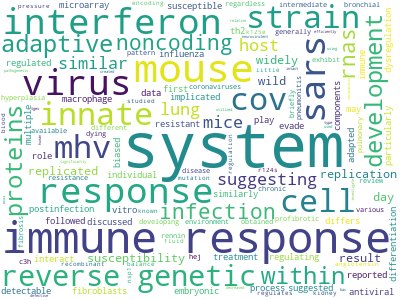

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=WordCloud(width=400,height=300,background_color='white').generate(resultss.summary[732])
word_cloud.to_image()

In [37]:
print(resultss.summary[732])

Multiple SARS-CoV proteins have been reported to interact with components of the innate immune system to evade an antiviral interferon response, and these are discussed below with the individual proteins that have been implicated in this process. Innate immune responses are detectable within the first few days postinfection, followed by the development of an adaptive immune response (Bergmann et al., 2006; Savarin and Bergmann, 2008) . The adaptive immune response to MHV-3 differs between susceptible and resistant mouse strains. MHV-1 replicated in all mouse strains, regardless of susceptibility to disease, suggesting that the development of pneumonitis was a result of the host immune responses. About 40% of these noncoding RNAs are similarly regulated during in vitro infection of mouse embryonic fibroblasts with mouse-adapted influenza virus and by interferon treatment, suggesting that these noncoding RNAs may play a role in regulating the host response to virus infection, particularl

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(resultss.summary[732])
plt.imshow(wordcloud, interpolation="bilinear")

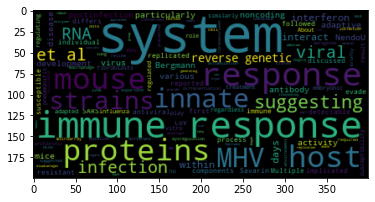

In [44]:
plt.imshow(wordcloud, interpolation="bilinear")

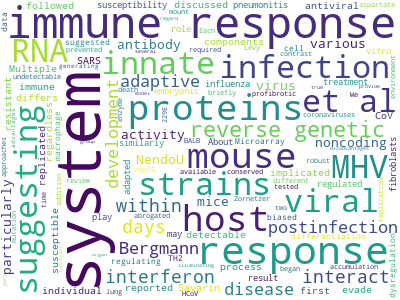

In [102]:

word_cloud=WordCloud(width=400,height=300,background_color='white').generate(resultss.summary[732])
word_cloud.to_image()

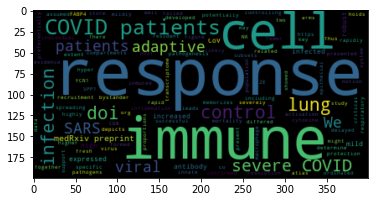

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(resultss.summary[77])
plt.imshow(wordcloud, interpolation="bilinear")

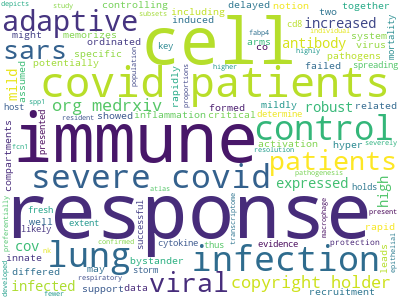

In [26]:

word_cloud=WordCloud(width=400,height=300,background_color='white').generate(resultss.summary[77])
word_cloud.to_image()

In [128]:
print(resultss.summary[77])

Together, our data showed an increased recruitment of immune cells to the lung in response to SARS-CoV-2 infection, and that the lung immune cell compartments differed between mild and severe COVID-19 patients. 23.20026690 doi: medRxiv preprint cells formed in the mildly infected patients support the notion that a rapid and robust adaptive immune response is potentially critical for controlling COVID-19. https://doi.org/10.1101/2020.02.23.20026690 doi: medRxiv preprint Adaptive immune system is specific and memorizes the pathogens, including two arms, the antibody and T cell responses. We assumed that it might be related to bystander activation induced by hyper inflammation, or a delayed response to the infection in severe COVID-19. A well co-ordinated innate and adaptive immune response may rapidly control of the virus, while a failed immune response leads to viral spreading, cytokine storm, and high mortality [15] . Thus, we presented the fresh evidence that CD8 + T cell response lik

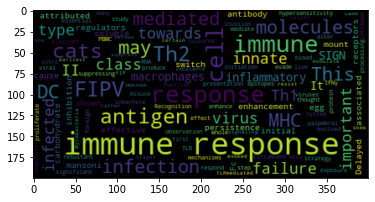

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(resultss.summary[355])
plt.imshow(wordcloud, interpolation="bilinear")

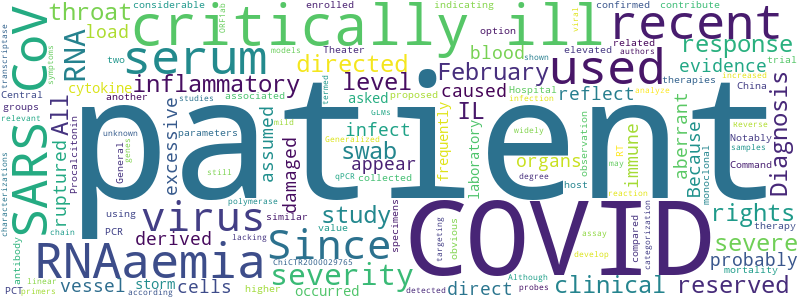

In [104]:

word_cloud=WordCloud(width=800,height=300,background_color='white').generate(resultss.summary[335])
word_cloud.to_image()

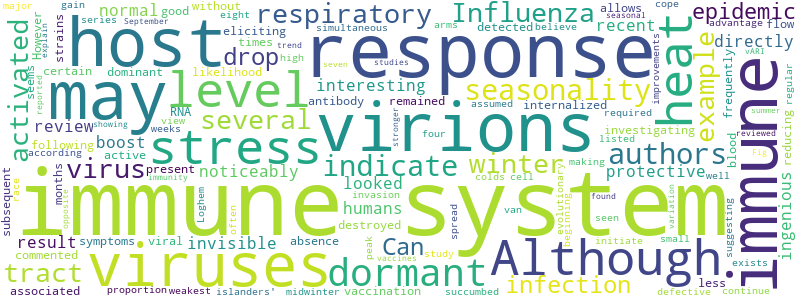

In [105]:
word_cloud=WordCloud(width=800,height=300,background_color='white').generate(resultss.summary[544])
word_cloud.to_image()

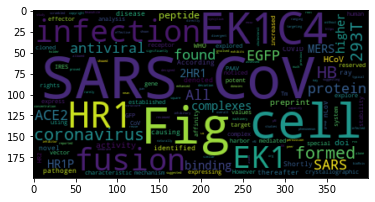

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(resultss.summary[394])
plt.imshow(wordcloud, interpolation="bilinear")

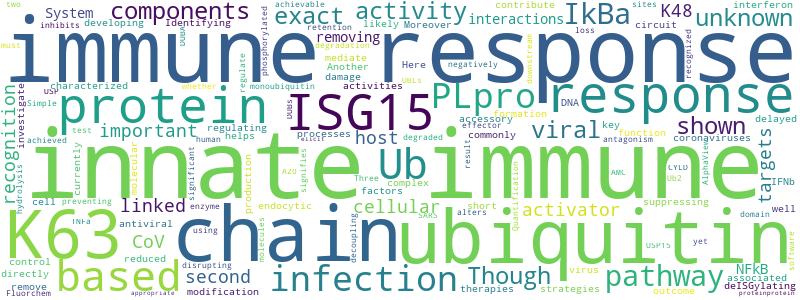

In [106]:
word_cloud=WordCloud(width=800,height=300,background_color='white').generate(resultss.summary[438])
word_cloud.to_image()

In [76]:
resultss.to_csv('wordnet+bm25.csv', index=False)

In [80]:
csv2=pd.read_csv('w.csv')

In [66]:
csv2.head()
csv2.shape

(1313, 6)

In [2]:
import pandas as pd
fil=pd.read_csv('results1.csv')

In [88]:
wordnetID=[]
wordnetScore=[]

for i in range(len(fil)):
    if i<50:
        wordnetID.append(fil.index[i])
        wordnetScore.append(fil.score[i])
print(wordnetID)
print(wordnetScore)
wordnetBM25_ID=[]
wordnetBM25_Score=[]

for i in range(len(csv2)):
     if i<50:
        wordnetBM25_ID.append(csv2.index[i])
        wordnetBM25_Score.append(csv2.score[i])
print(wordnetBM25_ID)
print(wordnetBM25_Score)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.12995083717962533, 0.09296168715155062, 0.2727006043597073, 0.06240339048417255, 0.16903521315172107, 0.1394580543608039, 0.07583951505777982, 0.15032221238409138, 0.08179544986373709, 0.22346436403237116, 0.11481205043788728, 0.3594155508573262, 0.16936800953673614, 0.08513717043906734, 0.13710770384836898, 0.10415301869952424, 0.1081705552930306, 0.1184871439816395, 0.09237165541090253, 0.06809760603301697, 0.0924199507484229, 0.12008820092976212, 0.11887262199843365, 0.11343474244777915, 0.09251339567369936, 0.10065230604096116, 0.09846513151200653, 0.17686227535968088, 0.10077747862219252, 0.09388702707469382, 0.13047700428014564, 0.16586514796108726, 0.1779531622918629, 0.08869558074082252, 0.0948937745772612, 0.08156789695338719, 0.177390952177038, 0.2555042986946424, 0.21622760067046687, 

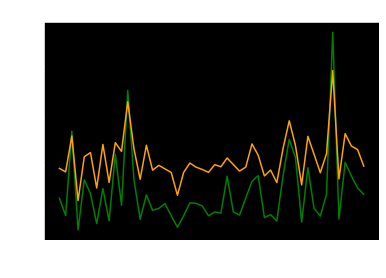

In [91]:
plt.plot(wordnetID, wordnetScore,'g')
plt.plot(wordnetID, wordnetBM25_Score,'orange')
plt.xlabel('ID of document')
plt.ylabel('Score')

plt.show()